<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab1_simple_pendulum/blob/main/Lab1_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple pendulum מטוטלת פשותה

Evgeny Kolonsky July 2023

Manual (Hebrew) [.pdf](https://github.com/evgeny-kolonsky/Lab1_simple_pendulum/blob/main/MathematicalPendulum_ver20171024.pdf)

In [64]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
from scipy import constants as const
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

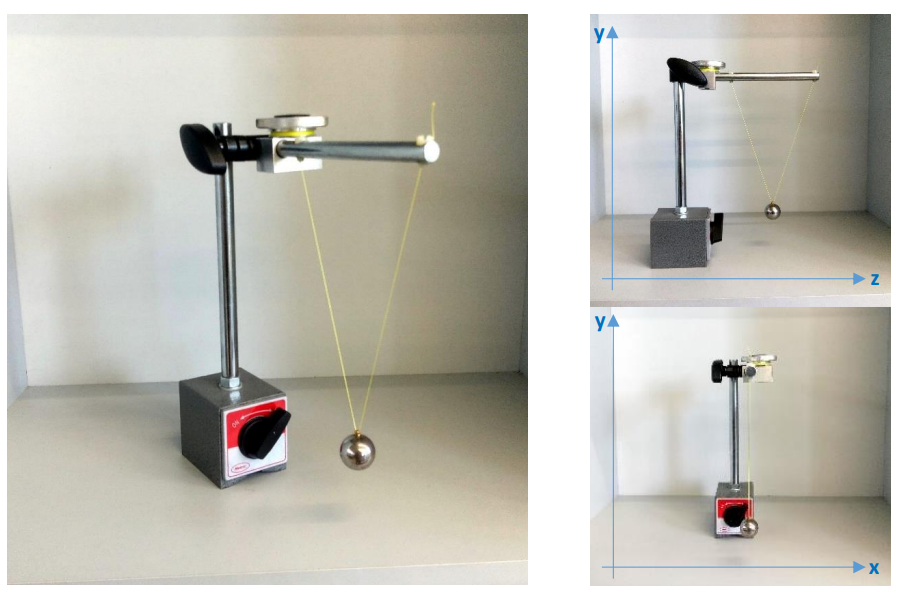

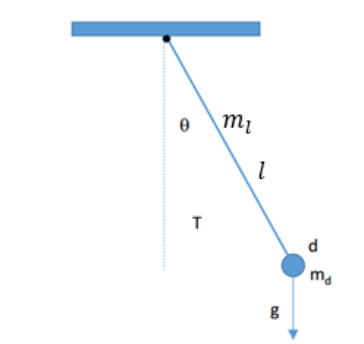

$$ \ln{T \over T_{max}} = \alpha \ln{l \over l_{max}}
$$



1.   Check linearity
2.   Ensure that $\alpha = 0.5$





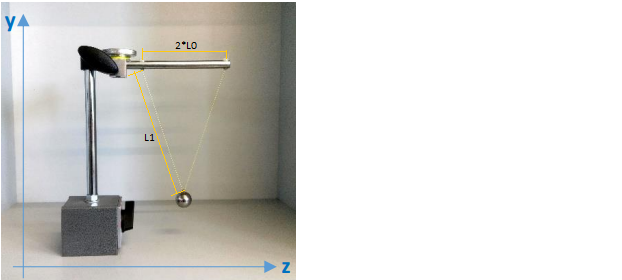

## L1 = 150 mm

In [72]:
l1 = 150 *1e-3 #mm

l = np.sqrt(l1**2 - l0**2) + d/2
T_theor = 2*const.pi*np.sqrt(l/const.g)
l_unc = 3e-3 / l
T_theor_unc = l_unc
print(f'Period T theoretical: {T_theor:.2f} ±{T_theor * T_theor_unc:.2f}c')


T theoretical: 0.78 ±0.02c


### small angle

Text(0.5, 1.0, 'Oscillations L=151 mm')

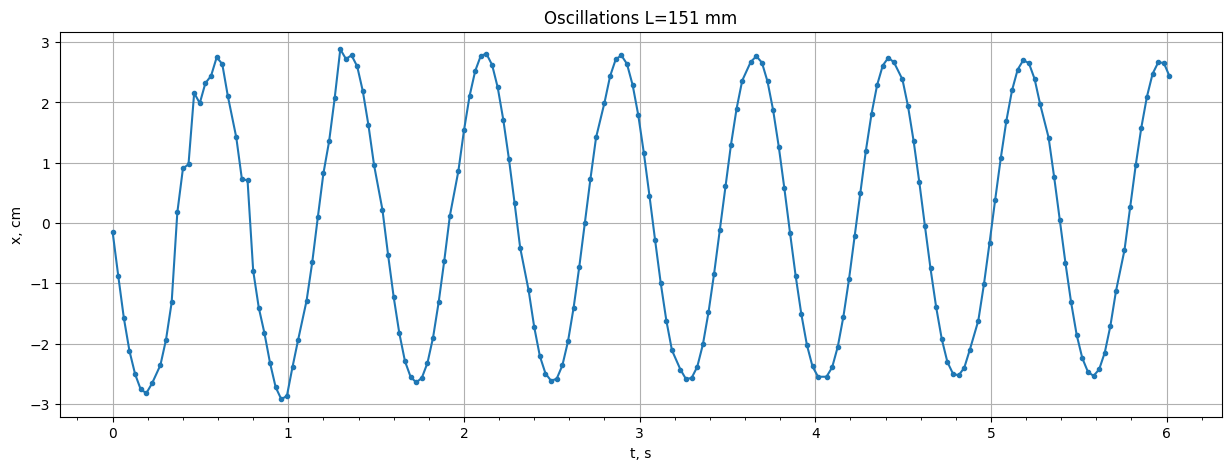

In [82]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab1_simple_pendulum/main/'
file = '150_1.txt'
text = requests.get(url+file).text.splitlines()[2:]

data = np.genfromtxt(text, delimiter='\t', dtype='float')
t, x, y = data.T


x -= x.mean()
t -= t.min()

plt.figure(figsize=(15,5))
plt.plot(t,x*1e2, '.-')
plt.gca().xaxis.set_major_locator(MultipleLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('t, s')
plt.ylabel('x, cm')
plt.grid()
plt.title(f'Oscillations L={l*1e3:.0f} mm')

In [74]:
t1 = 5.6 # s
t0 = 0.2 # s
t_unc = 0.1 # s
T = (t1 - t0) / 7
T_unc = 2*t_unc /7 #s
print(f'Period T empiric: {T:.2f} ±{T * T_unc:.2f}c')

Period T empiric: 0.77 ±0.02c


### big angle

Text(0.5, 1.0, 'Oscillations L=151 mm')

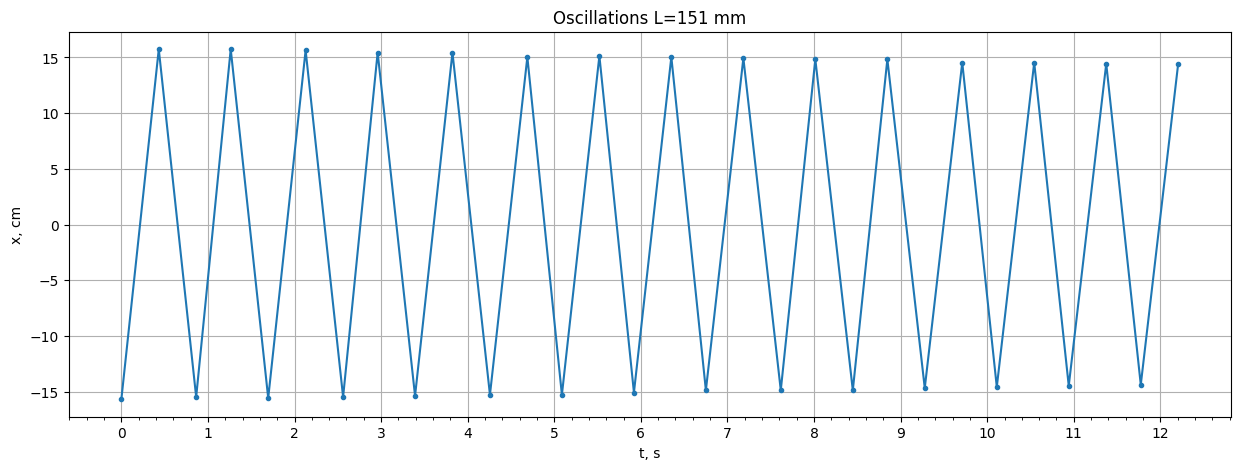

In [84]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab1_simple_pendulum/main/'
file = '150_2.txt'
text = requests.get(url+file).text.splitlines()[2:]

data = np.genfromtxt(text, delimiter='\t', dtype='float')
data = data[~np.isnan(data).any(axis=1)]
t, x, y = data.T


x -= x.mean()
t -= t.min()

plt.figure(figsize=(15,5))
plt.plot(t,x*1e2, '.-')
plt.gca().xaxis.set_major_locator(MultipleLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('t, s')
plt.ylabel('x, cm')
plt.grid()
plt.title(f'Oscillations L={l*1e3:.0f} mm')

In [85]:
t1 = 11.8 # s
t0 = 0.0 # s
N = 14
t_unc = 0.1 # s
T = (t1 - t0) / N
T_unc = 2*t_unc /N #s
print(f'Period T empiric: {T:.2f} ±{T * T_unc:.2f}c')

Period T empiric: 0.84 ±0.01c
